# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/jinbonnie/animal-data

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
df=pd.read_csv ("animal-data-1.csv")

#I decided to import all of the libraries and organized each library.  

In [5]:
df.head() #I used this code to make sure the data set got imported correctly 

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [20]:
df.tail(10)# I chose this code to explore the bottom of the data set.
df.info()# Used this funcation to see what types of data I'm working with and to get a better view of the columns.
iscat=df["speciesname"]=="Cat" #Boolen used to determine what rows are cats.
cats_df=df[iscat]  #This is a new dataframe filtered to only cats.
cats_df.tail(20)  #check to see if previous code worked.
print(cats_df.shape) #checking how many there are, the answer is 5749.
len(cats_df[cats_df["basecolour"]=="Black"]) #I used this code to see how many black cats there are, out of 5749 cats only 917 were black
cat_adopt_df=cats_df[cats_df["movementtype"]=="Adoption"]
len(cat_adopt_df) #Create a dataframe for Adoptions cause im not factoring in fosters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10290 non-null  int64  
 1   intakedate        10290 non-null  object 
 2   intakereason      10288 non-null  object 
 3   istransfer        10290 non-null  int64  
 4   sheltercode       10290 non-null  object 
 5   identichipnumber  8324 non-null   object 
 6   animalname        10290 non-null  object 
 7   breedname         10245 non-null  object 
 8   basecolour        10290 non-null  object 
 9   speciesname       10290 non-null  object 
 10  animalage         10290 non-null  object 
 11  sexname           10290 non-null  object 
 12  location          10290 non-null  object 
 13  movementdate      10290 non-null  object 
 14  movementtype      10290 non-null  object 
 15  istrial           10289 non-null  float64
 16  returndate        3256 non-null   object

3241

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

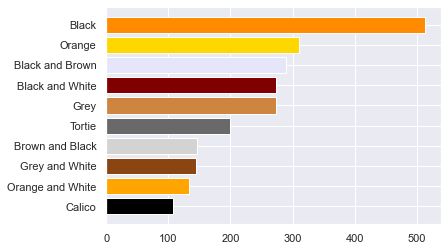

In [37]:
colors=["black","orange","saddlebrown","lightgray","dimgrey","peru","maroon","lavender","gold","darkorange"]
a_counts=cat_adopt_df["basecolour"].value_counts().nlargest(10).sort_values()
#a_counts.plot(kind="barh",figsize=(20,20),title="Cat adoptions by color",color=colors)
plt.barh(a_counts.keys(),a_counts.array,color=colors)
plt.show()

#Used a bar graph to compare adoptions by color. I attempted to color the bars but the ordering didnt work.
#I spent two hours troubleshooting the reason it reversed my colors and couldnt figure it out, I tried .reverse and it removed all of the colors.

<AxesSubplot:title={'center':'Cat adoptions by intake reason'}, ylabel='intakereason'>

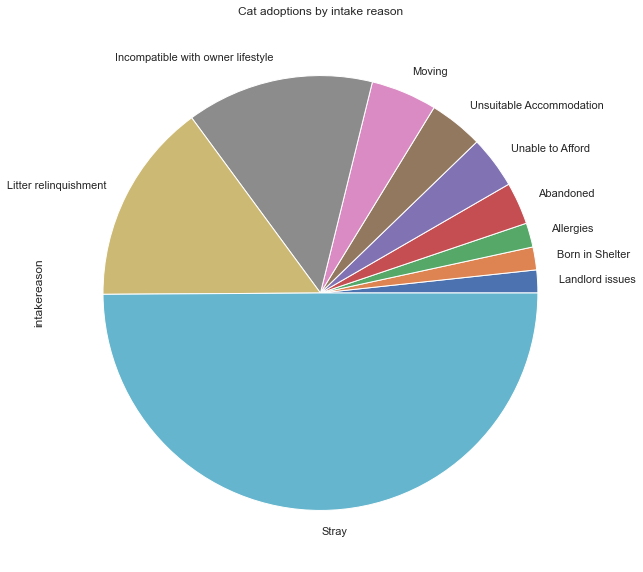

In [44]:
intake_counts=cat_adopt_df["intakereason"].value_counts().nlargest(10).sort_values()
intake_counts.plot(kind="pie",figsize=(10,10),title="Cat adoptions by intake reason")

#I know pie charts are not idea but inorder to show composition with out time as factor, this was the only option. 
#I used a piechart to see Cat adoptions by intake reason.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
I was surprised to see the amount of black cat adoptions and to see how many people surrendered their cats due to "litter issues"
2. Do you have any concerns about your dataset? 
I hope I have enough data for my business concern.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
I dont not see any outliers for cat adoptions. 